In [3]:
!pip install seaborn

Train shape: (891, 12)
Test shape: (418, 11)
Gender submission shape: (418, 2)

First 5 Rows of Train:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3    

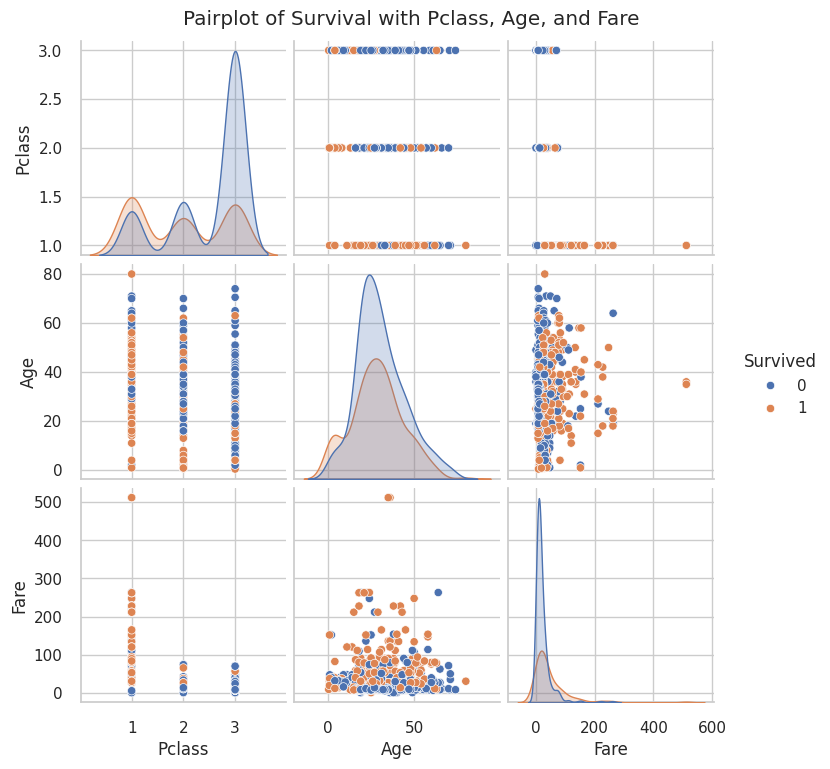

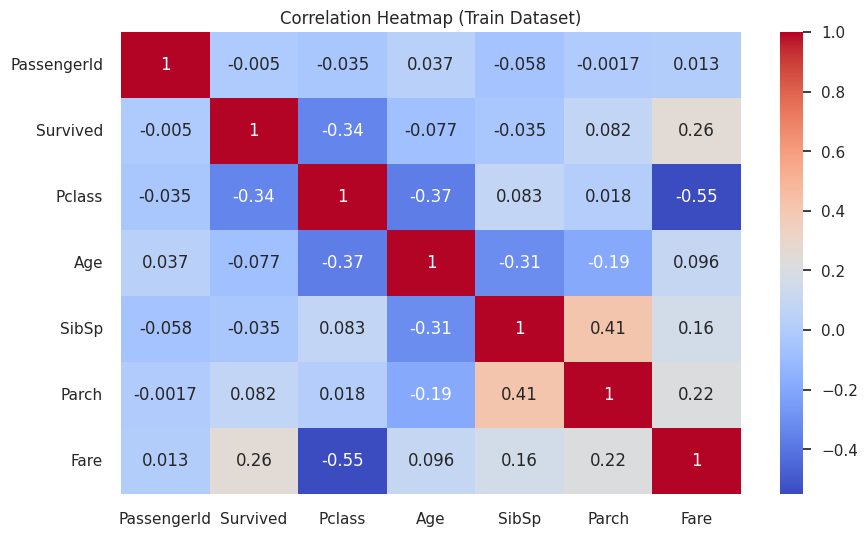

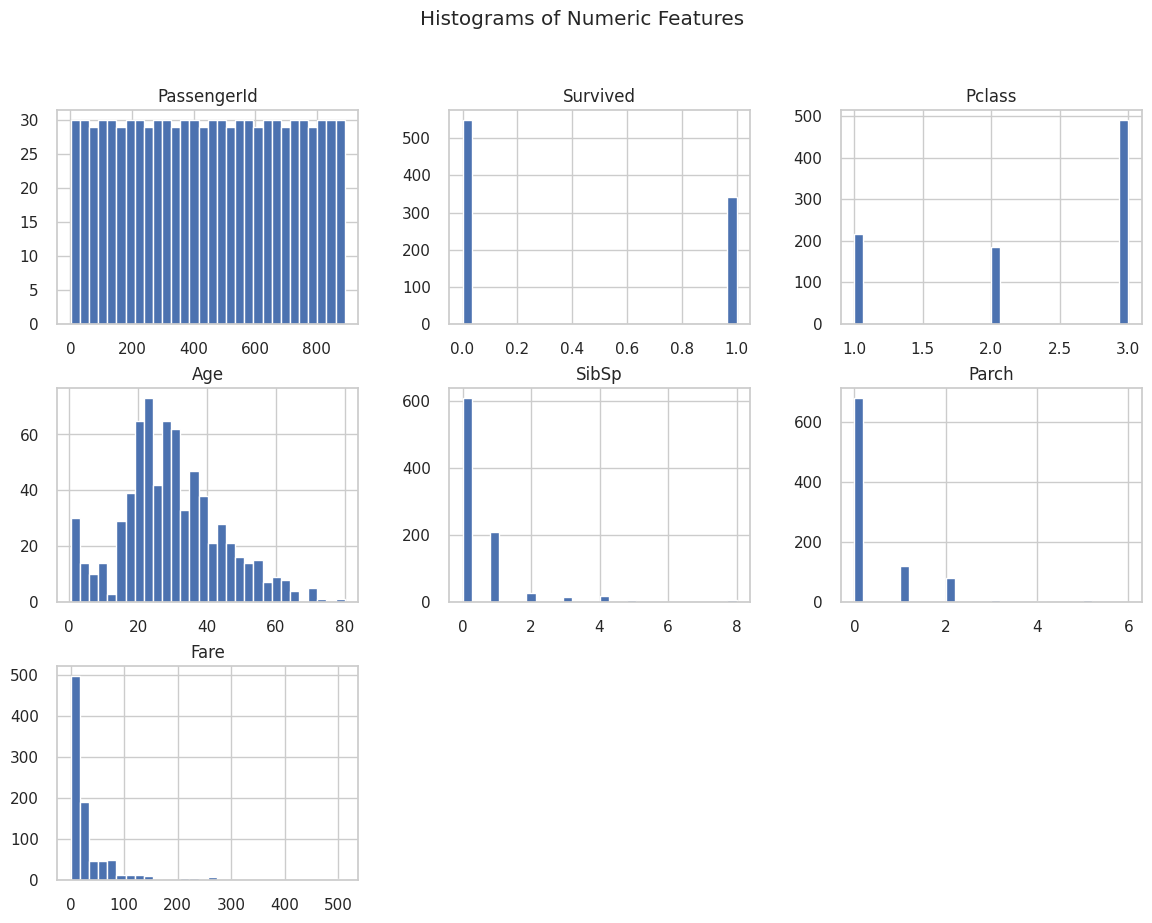

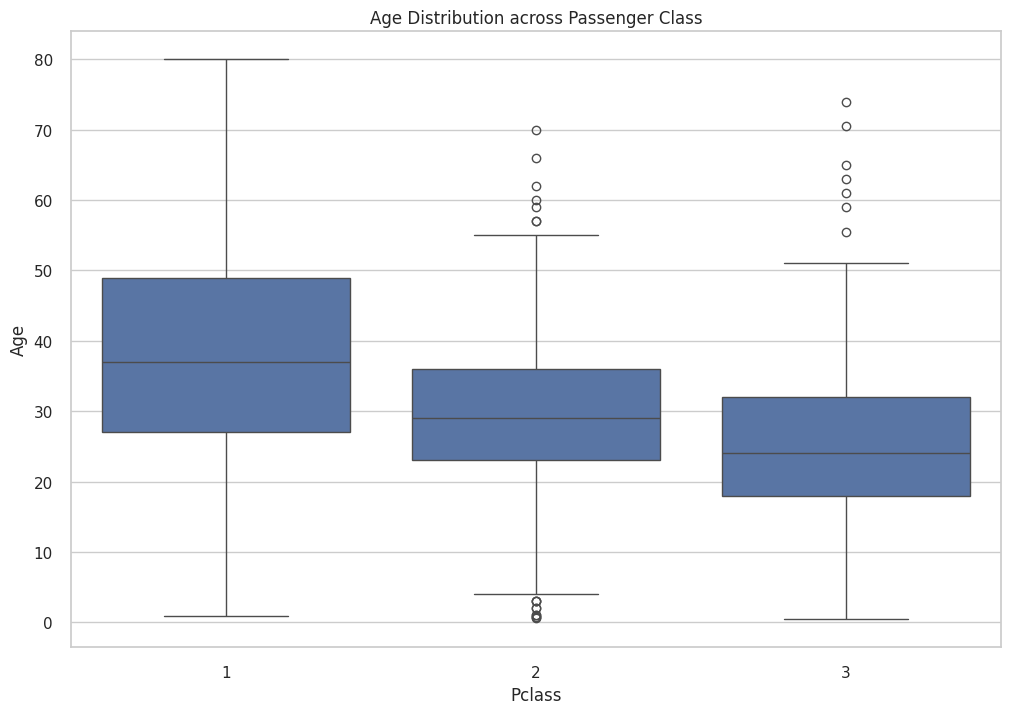

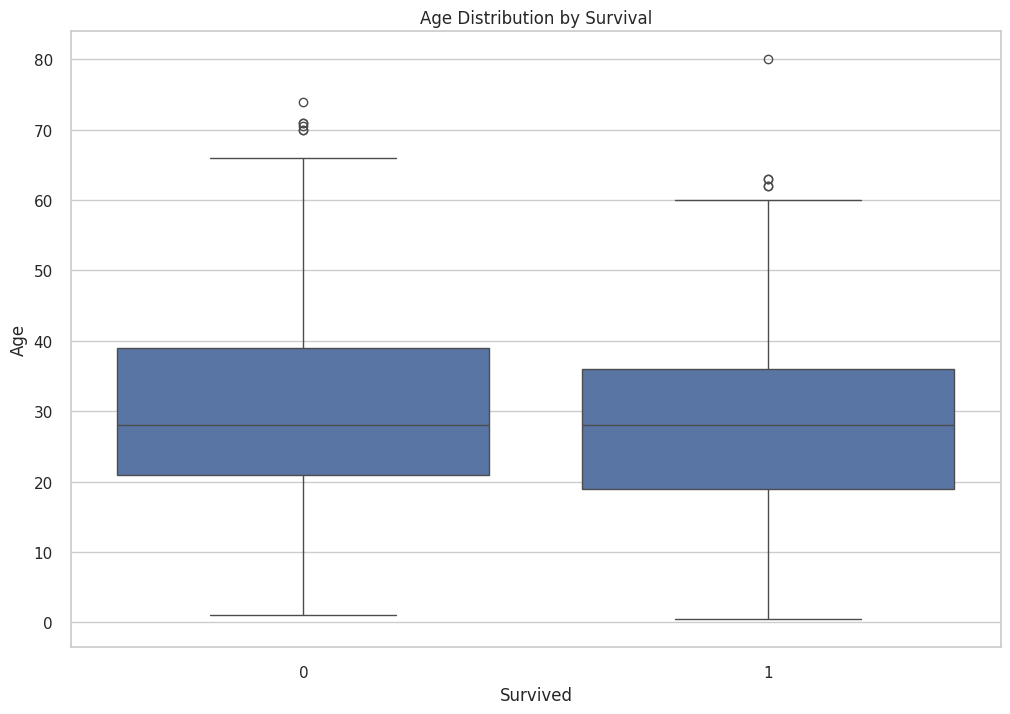

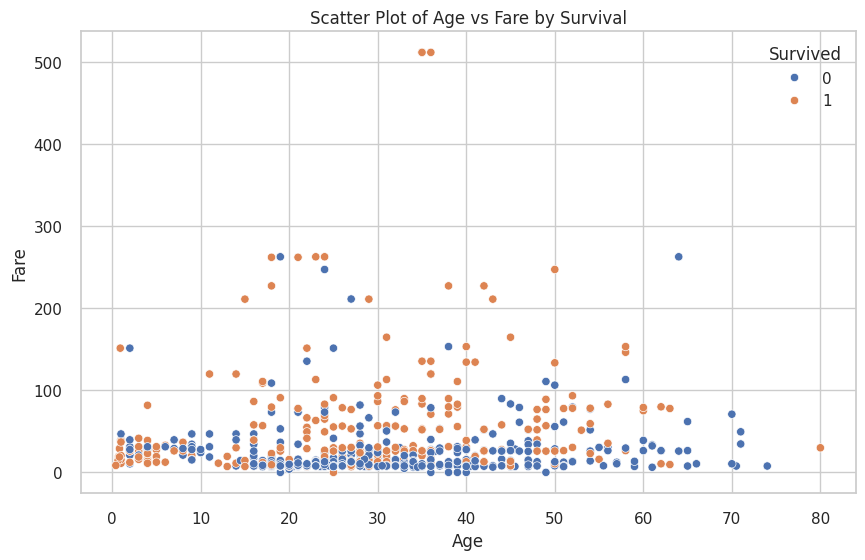

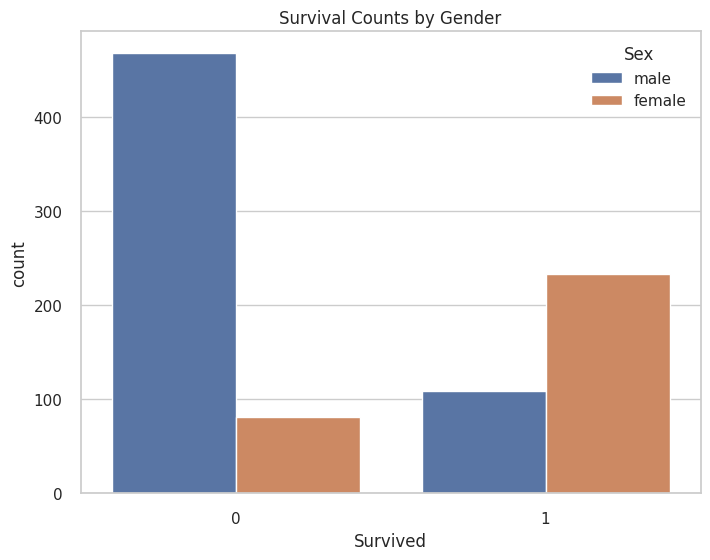

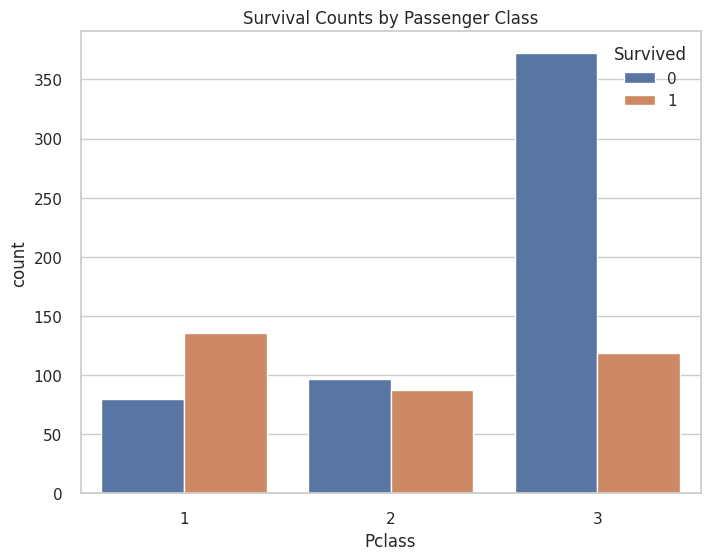


Summary of Exploratory Data Analysis:
- Females had a significantly higher survival rate.
- 1st Class passengers had better survival chances.
- Younger passengers had better survival rates.
- Paying higher Fares increased survival chance.
- Most passengers embarked from 'Southampton'.


Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
m

In [6]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Set Visual Styles
sns.set(style="whitegrid")  # Seaborn's nice white background

# 3. Load Datasets
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
gender_submission = pd.read_csv('/content/gender_submission.csv')

# 4. Dataset Shapes
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Gender submission shape: {gender_submission.shape}")

# a. Basic Information
print("\nFirst 5 Rows of Train:")
print(train.head())

print("\nTrain Dataset Info:")
print(train.info())

print("\nTrain Dataset Statistical Summary:")
print(train.describe())

print("\nMissing Values in Train Dataset:")
print(train.isnull().sum())

print("\nValue Counts (Train Dataset):")
for col in ['Sex', 'Embarked', 'Pclass', 'Survived']:
    print(f"\n{col}:\n", train[col].value_counts())

# b. Visualizations

# Only select numeric columns for correlation
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric Columns:", numeric_cols.tolist())

# 1. Pairplot (only relevant columns)
sns.pairplot(train[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.suptitle('Pairplot of Survival with Pclass, Age, and Fare', y=1.02)
plt.show()

# Observation:
# - Survivors tend to belong to 1st class and paid higher Fares.

# 2. Heatmap of Correlation (only numeric)
plt.figure(figsize=(10,6))
sns.heatmap(train[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Train Dataset)')
plt.show()

# Observation:
# - Fare positively correlates with Survival.
# - Pclass negatively correlates with Survival.

# 3. Histograms
train.hist(figsize=(14,10), bins=30)
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Observation:
# - Age is slightly right-skewed.
# - Fare shows few passengers with very high tickets.

# 4. Boxplots

# Age across Passenger Class
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y='Age', data=train)
plt.title('Age Distribution across Passenger Class')
plt.show()

# Observation:
# - 1st class passengers are older on average.

# Age by Survival
plt.figure(figsize=(12,8))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age Distribution by Survival')
plt.show()

# Observation:
# - Younger passengers had slightly higher survival rates.

# 5. Scatterplot: Age vs Fare colored by Survival
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train)
plt.title('Scatter Plot of Age vs Fare by Survival')
plt.show()

# Observation:
# - Survivors often paid higher Fares.

# 6. Countplots

# Survival by Gender
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival Counts by Gender')
plt.show()

# Observation:
# - Females had much higher survival rates.

# Survival by Passenger Class
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Counts by Passenger Class')
plt.show()

# Observation:
# - 1st class passengers survived more.

# f. Summary of Findings
summary = """
Summary of Exploratory Data Analysis:
- Females had a significantly higher survival rate.
- 1st Class passengers had better survival chances.
- Younger passengers had better survival rates.
- Paying higher Fares increased survival chance.
- Most passengers embarked from 'Southampton'.
"""
print(summary)

# Additional Step: Quick Info about Test Dataset
print("\nTest Dataset Info:")
print(test.info())
print("\nMissing Values in Test Dataset:")
print(test.isnull().sum())

# Optional: Merge gender_submission with test if needed for further analysis
# merged_test = pd.merge(test, gender_submission, on='PassengerId')
# print(merged_test.head())
